[요일별 유동인구]

        10월       11월       12월
월  12951174  12875377  10511251
화  13244196  13323442  10631126
수  13330332  13342187  10552691
목  11464031  13077431  10480261
금  10993739  13518882   9530840
토   8721055   8902166   6130706
일   6254152   6248578   4194254


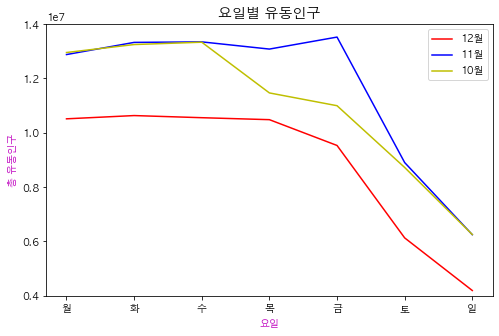

In [36]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
w12 = [20201205, 20201206,20201212,20201213,20201219,20201220,20201226,20201227]
w11 = [20201107, 20201108,20201114,20201115,20201121,20201122,20201128,20201129]
w10 = [20201003, 20201004,20201010,20201011,20201017,20201018,20201024,20201025,20201031]
d = ['화', '수', '목', '금', '토', '일','월']*4+['화','수', '목']
d10 = ['목', '금', '토', '일','월','화', '수']*4+['목','금', '토']
d11 = ['일','월','화', '수','목', '금', '토']*4+['일','월']
d_order = ['월', '화', '수', '목', '금', '토', '일']


data12['총 유동인구'] = data12['승차승객수']+data12['하차승객수']
data11['총 유동인구'] = data11['승차승객수']+data11['하차승객수']
data10['총 유동인구'] = data10['승차승객수']+data10['하차승객수']

print('[요일별 유동인구]\n')
df12_d=pd.pivot_table(data12, index = ['날짜'], values=['총 유동인구'], aggfunc=np.sum)
df11_d=pd.pivot_table(data11, index = ['날짜'], values=['총 유동인구'], aggfunc=np.sum)
df10_d=pd.pivot_table(data10, index = ['날짜'], values=['총 유동인구'], aggfunc=np.sum)
df12_y = df12_d.groupby(d).mean().apply(round).astype(int).reindex(d_order).sum(axis=1)
df11_y = df11_d.groupby(d11).mean().apply(round).astype(int).reindex(d_order).sum(axis=1)
df10_y = df10_d.groupby(d10).mean().apply(round).astype(int).reindex(d_order).sum(axis=1)
df=pd.concat([df10_y, df11_y, df12_y], axis=1, keys=['10월','11월', '12월'])
print(df)
df12_di=pd.pivot_table(data12, index = ['날짜'], values=['승차승객수'], aggfunc=np.sum)
df12_yi = df12_di.groupby(d).mean().apply(round).astype(int).reindex(d_order).sum(axis=1)
df12_do=pd.pivot_table(data12, index = ['날짜'], values=['하차승객수'], aggfunc=np.sum)
df12_yo = df12_do.groupby(d).mean().apply(round).astype(int).reindex(d_order).sum(axis=1)


fig = plt.figure(figsize=(8,5))
ax1=fig.add_subplot(1,1,1)
ax1.plot(df12_y, color='red', label='12월')
ax1.plot(df11_y, color='blue',label='11월')
ax1.plot(df10_y, color='y',label='10월')
ax1.set_xlabel('요일', color='m')
ax1.set_ylabel('총 유동인구', color='m')
ax1.set_title('요일별 유동인구', fontsize=14)
ax1.set_ylim(4000000,14000000)
ax1.legend(loc="best")


[평일/주말 총 유동인구]

         10월       11월       12월
평일  26495878  27305711  21594890
주말   7624653   7565132   5162480


Text(0, 0.5, '총 유동인구')

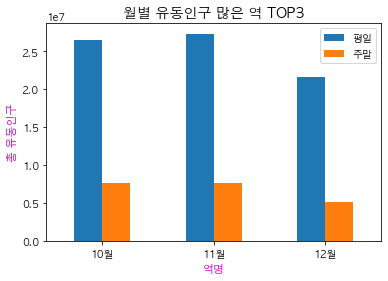

In [101]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
w12 = [20201205, 20201206,20201212,20201213,20201219,20201220,20201226,20201227]
w11 = [20201107, 20201108,20201114,20201115,20201121,20201122,20201128,20201129]
w10 = [20201003, 20201004,20201010,20201011,20201017,20201018,20201024,20201025,20201031]
d = ['화', '수', '목', '금', '토', '일','월']*4+['화','수', '목']
d10 = ['목', '금', '토', '일','월','화', '수']*4+['목','금', '토']
d11 = ['일','월','화', '수','목', '금', '토']*4+['일','월']
d_order = ['월', '화', '수', '목', '금', '토', '일']


data12['총 유동인구'] = data12['승차승객수']+data12['하차승객수']
data11['총 유동인구'] = data11['승차승객수']+data11['하차승객수']
data10['총 유동인구'] = data10['승차승객수']+data10['하차승객수']

df12_da = pd.pivot_table(data12, index = ['날짜'], columns='역명', values='총 유동인구', margins=True, margins_name='총 유동인구',aggfunc=np.sum)
df12_da=df12_da.groupby(lambda x: '주말' if x in w12 else '평일').mean().apply(round).astype(int)
df11_da = pd.pivot_table(data11, index = ['날짜'], columns='역명', values='총 유동인구', margins=True, margins_name='총 유동인구',aggfunc=np.sum)
df11_da=df11_da.groupby(lambda x: '주말' if x in w11 else '평일').mean().apply(round).astype(int)
df10_da = pd.pivot_table(data10, index = ['날짜'], columns='역명', values='총 유동인구', margins=True, margins_name='총 유동인구',aggfunc=np.sum)
df10_da=df10_da.groupby(lambda x: '주말' if x in w10 else '평일').mean().apply(round).astype(int)
df=pd.concat([df10_da['총 유동인구'], df11_da['총 유동인구'], df12_da['총 유동인구']], axis=1, keys=['10월','11월', '12월']).reindex(['평일','주말'])

print('[평일/주말 총 유동인구]\n')
print(df)
df.T.plot.bar(rot=0)
plt.title("월별 유동인구 많은 역 TOP3", fontsize=14)
plt.xlabel('역명', color='m', fontsize=11)
plt.ylabel('총 유동인구', color='m', fontsize=11)



[주말에 유동인구가 많은 역 TOP3]

역명
고속터미널       75930
잠실(송파구청)    69584
신림          57758
Name: 주말, dtype: int64
역명
고속터미널       121118
잠실(송파구청)    111389
홍대입구        110312
Name: 주말, dtype: int64
역명
고속터미널       123127
홍대입구        116950
잠실(송파구청)    113173
Name: 주말, dtype: int64

[평일에 유동인구가 많은 역 TOP3]

역명
강남          155069
잠실(송파구청)    145599
선릉          127810
Name: 평일, dtype: int64
역명
강남          164888
잠실(송파구청)    153899
선릉          137781
Name: 평일, dtype: int64
역명
강남          120079
잠실(송파구청)    119921
선릉          112899
Name: 평일, dtype: int64


(-1.1122646475770355,
 1.150977161900066,
 -1.113721464274714,
 1.1980713538553902)

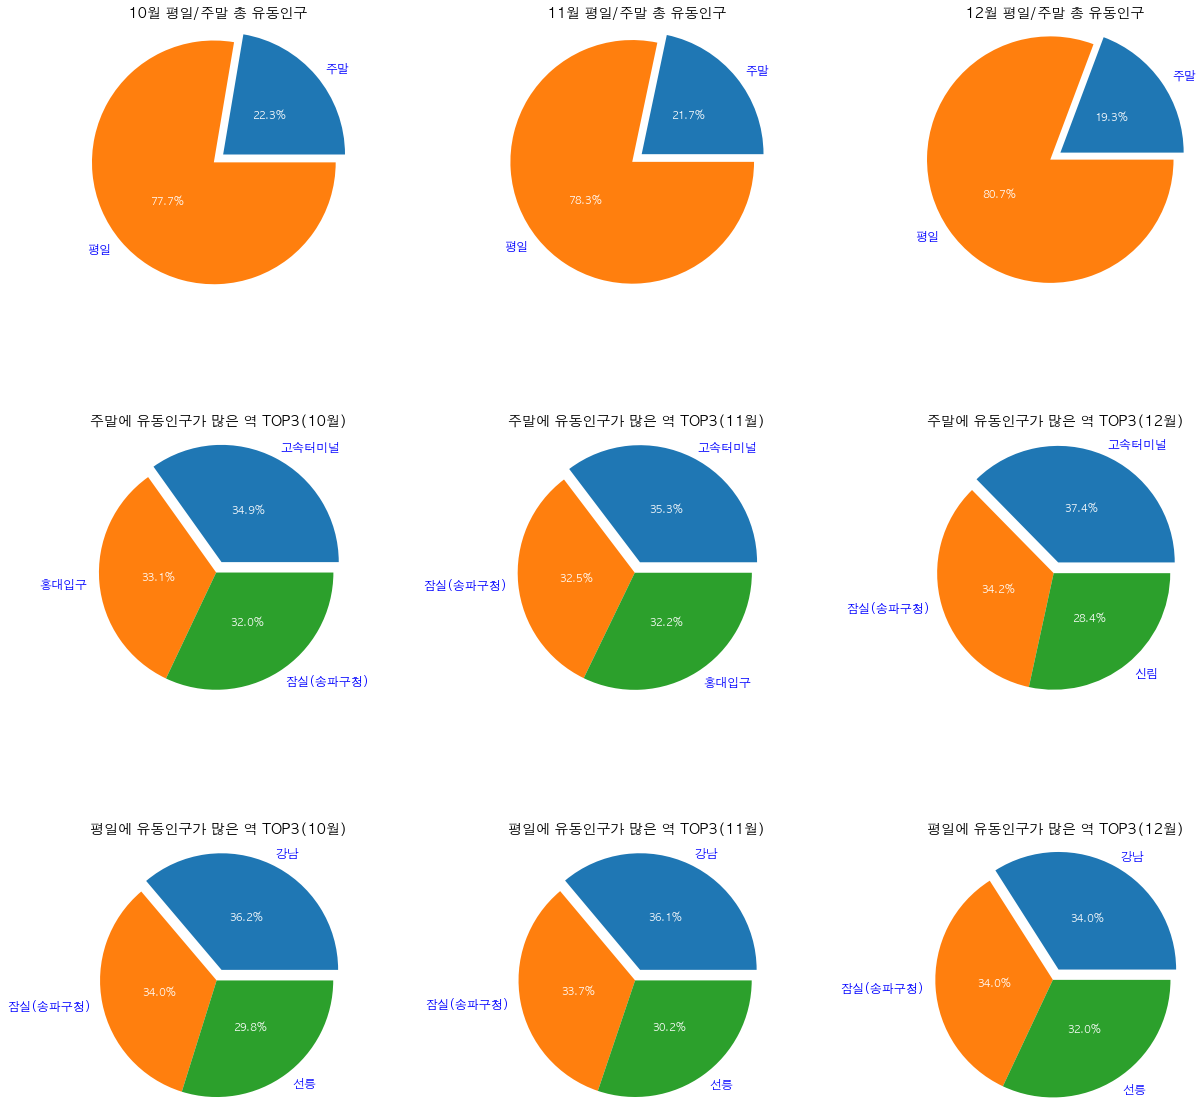

In [65]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
w12 = [20201205, 20201206,20201212,20201213,20201219,20201220,20201226,20201227]
w11 = [20201107, 20201108,20201114,20201115,20201121,20201122,20201128,20201129]
w10 = [20201003, 20201004,20201010,20201011,20201017,20201018,20201024,20201025,20201031]
d = ['화', '수', '목', '금', '토', '일','월']*4+['화','수', '목']
d10 = ['목', '금', '토', '일','월','화', '수']*4+['목','금', '토']
d11 = ['일','월','화', '수','목', '금', '토']*4+['일','월']
d_order = ['월', '화', '수', '목', '금', '토', '일']


data12['총 유동인구'] = data12['승차승객수']+data12['하차승객수']
data11['총 유동인구'] = data11['승차승객수']+data11['하차승객수']
data10['총 유동인구'] = data10['승차승객수']+data10['하차승객수']
df12_da = pd.pivot_table(data12, index = ['날짜'], columns='역명', values='총 유동인구', margins=True, margins_name='총 유동인구',aggfunc=np.sum)
df12_da=df12_da.groupby(lambda x: '주말' if x in w12 else '평일').mean().apply(round).astype(int)
df11_da = pd.pivot_table(data11, index = ['날짜'], columns='역명', values='총 유동인구', margins=True, margins_name='총 유동인구',aggfunc=np.sum)
df11_da=df11_da.groupby(lambda x: '주말' if x in w11 else '평일').mean().apply(round).astype(int)
df10_da = pd.pivot_table(data10, index = ['날짜'], columns='역명', values='총 유동인구', margins=True, margins_name='총 유동인구',aggfunc=np.sum)
df10_da=df10_da.groupby(lambda x: '주말' if x in w10 else '평일').mean().apply(round).astype(int)
print('=================================================\n')
print('[주말에 유동인구가 많은 역 TOP3]\n')
df12_ra = pd.pivot_table(data12, index = ['날짜'], columns='역명',values=['총 유동인구'], aggfunc=np.sum)
df12_ra = df12_ra.groupby(lambda x: '주말' if x in w12 else '평일').mean().apply(round).astype(int).T
df12_ra=df12_ra.unstack(level=0).xs('총 유동인구', axis=1, level=1)

df11_ra = pd.pivot_table(data11, index = ['날짜'], columns='역명',values=['총 유동인구'], aggfunc=np.sum)
df11_ra = df11_ra.groupby(lambda x: '주말' if x in w11 else '평일').mean().apply(round).astype(int).T
df11_ra=df11_ra.unstack(level=0).xs('총 유동인구', axis=1, level=1)


df10_ra = pd.pivot_table(data10, index = ['날짜'], columns='역명',values=['총 유동인구'], aggfunc=np.sum)
df10_ra = df10_ra.groupby(lambda x: '주말' if x in w10 else '평일').mean().apply(round).astype(int).T
df10_ra=df10_ra.unstack(level=0).xs('총 유동인구', axis=1, level=1)


print(df12_ra.nlargest(3, '주말')['주말'])
print(df11_ra.nlargest(3, '주말')['주말'])
print(df10_ra.nlargest(3, '주말')['주말'])
print('=================================================\n')
print('[평일에 유동인구가 많은 역 TOP3]\n')
print(df10_ra.nlargest(3, '평일')['평일'])
print(df11_ra.nlargest(3, '평일')['평일'])
print(df12_ra.nlargest(3, '평일')['평일'])

fig = plt.figure(figsize=(20,20))
ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)
ax7=fig.add_subplot(3,3,7)
ax8=fig.add_subplot(3,3,8)
ax9=fig.add_subplot(3,3,9)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
wedges, texts, autotexts = ax1.pie(df10_da['총 유동인구'],explode=(0,0.1),autopct='%.1f%%', pctdistance=0.5, labels=['주말', '평일'])
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')
ax1.set_title('10월 평일/주말 총 유동인구', fontsize=14)
ax1.axis('equal')

wedges, texts, autotexts = ax2.pie(df11_da['총 유동인구'],explode=(0,0.1),autopct='%.1f%%', pctdistance=0.5, labels=['주말', '평일'])
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')
ax2.set_title('11월 평일/주말 총 유동인구', fontsize=14)
ax2.axis('equal')

wedges, texts, autotexts = ax3.pie(df12_da['총 유동인구'],explode=(0,0.1),autopct='%.1f%%', pctdistance=0.5, labels=['주말', '평일'])
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')
ax3.set_title('12월 평일/주말 총 유동인구', fontsize=14)
ax3.axis('equal')


wedges, texts, autotexts = ax4.pie(df10_ra.nlargest(3, '주말')['주말'],explode=(0.1,0,0),autopct='%.1f%%', pctdistance=0.5, labels=df10_ra.nlargest(3, '주말')['주말'].index)
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')

ax4.set_title('주말에 유동인구가 많은 역 TOP3(10월)', fontsize=14)
ax4.axis('equal')

wedges, texts, autotexts = ax5.pie(df11_ra.nlargest(3, '주말')['주말'],explode=(0.1,0,0),autopct='%.1f%%', pctdistance=0.5, labels=df11_ra.nlargest(3, '주말')['주말'].index)
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')

ax5.set_title('주말에 유동인구가 많은 역 TOP3(11월)', fontsize=14)
ax5.axis('equal')

wedges, texts, autotexts = ax6.pie(df12_ra.nlargest(3, '주말')['주말'],explode=(0.1,0,0),autopct='%.1f%%', pctdistance=0.5, labels=df12_ra.nlargest(3, '주말')['주말'].index)
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')

ax6.set_title('주말에 유동인구가 많은 역 TOP3(12월)', fontsize=14)
ax6.axis('equal')

wedges, texts, autotexts = ax7.pie(df10_ra.nlargest(3, '평일')['평일'],explode=(0.1,0,0),autopct='%.1f%%', pctdistance=0.5, labels=df10_ra.nlargest(3, '평일')['평일'].index)
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')
ax7.set_title('평일에 유동인구가 많은 역 TOP3(10월)', fontsize=14)
ax7.axis('equal')

wedges, texts, autotexts = ax8.pie(df11_ra.nlargest(3, '평일')['평일'],explode=(0.1,0,0),autopct='%.1f%%', pctdistance=0.5, labels=df11_ra.nlargest(3, '평일')['평일'].index)
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')
ax8.set_title('평일에 유동인구가 많은 역 TOP3(11월)', fontsize=14)
ax8.axis('equal')

wedges, texts, autotexts =ax9.pie(df12_ra.nlargest(3, '평일')['평일'],explode=(0.1,0,0),autopct='%.1f%%', pctdistance=0.5, labels=df12_ra.nlargest(3, '평일')['평일'].index)
for t in texts:
    t.set_color('b')
    t.set_fontsize(12)
for a in autotexts:
    a.set_color('w')
ax9.set_title('평일에 유동인구가 많은 역 TOP3(12월)', fontsize=14)
ax9.axis('equal')


[거리두기 단계별 유동인구]

             1단계       2단계    2.5단계
총 유동인구  23625065  19946342  8738396

[거리두기 후 유동인구 차이가 큰 역 TOP3]

역명
강남     20224
선릉     13768
서울역    13388
Name: 전/후 차이, dtype: int64

[거리두기 후 유동인구 차이가 작은 역 TOP3]

역명
달월      2
둔촌오륜    5
임진강     5
Name: 전/후 차이, dtype: int64


Text(0, 0.5, '총 유동인구')

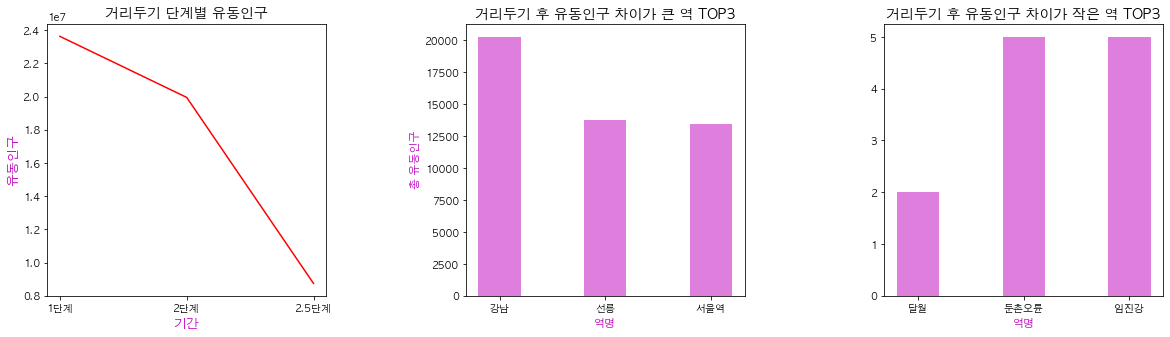

In [142]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)

data12['총 유동인구'] = data12['승차승객수']+data12['하차승객수']
data11['총 유동인구'] = data11['승차승객수']+data11['하차승객수']
data10['총 유동인구'] = data10['승차승객수']+data10['하차승객수']
#10/1~10/18:2단계, 10/18~11/31:1단계
#12/1~12/7:2단계, 12/8~:2.5단계
print('[거리두기 단계별 유동인구]\n')
df12_ba = pd.pivot_table(data12, index = ['날짜'], values=['승차승객수', '하차승객수'], aggfunc=np.sum)
df12_ba = df12_ba.groupby(lambda x: '2단계' if x in range(20201201,20201208) else '2.5단계').mean().apply(round).astype(int)
df12_ba['총 유동인구'] = df12_ba.sum(axis=1)
df12_ba = df12_ba['총 유동인구']
df11_ba = pd.pivot_table(data11, index = ['날짜'], values=['승차승객수', '하차승객수'], aggfunc=np.sum)
df11_ba = df11_ba.groupby(lambda x: '1단계' if x in range(20201101,20201131) else '2단계').mean().apply(round).astype(int)
df11_ba['총 유동인구'] = df11_ba.sum(axis=1)
df11_ba = df11_ba['총 유동인구']
df10_ba = pd.pivot_table(data10, index = ['날짜'], values=['승차승객수', '하차승객수'], aggfunc=np.sum)
df10_ba = df10_ba.groupby(lambda x: '2단계' if x in range(20201001,20201018) else '1단계').mean().apply(round).astype(int)
df10_ba['총 유동인구'] = df10_ba.sum(axis=1)
df10_ba = df10_ba['총 유동인구']
st1 = df11_ba[0]+df10_ba[0]
st2 = df12_ba[1]+df10_ba[1]
st3 = df12_ba[0]
df = pd.DataFrame(data=[st1, st2, st3], index=['1단계', '2단계', '2.5단계'], columns=['총 유동인구'])
print(df.T)
print('=================================================\n')
print('[거리두기 후 유동인구 차이가 큰 역 TOP3]\n')
#df12_ra=df12_ra.unstack(level=0).xs('총 유동인구', axis=1, level=1)

df12_ba2 = pd.pivot_table(data12, index = ['날짜'], columns = ['역명'], values=['총 유동인구'], aggfunc=np.sum)
df12_ba2 = df12_ba2.groupby(lambda x: '거리두기 전(~12/7)' if x in range(20201201,20201208) else '거리두기 후(12/8~)').mean().apply(round).astype(int).T
df12_ba2['전/후 차이'] = np.abs(df12_ba2['거리두기 전(~12/7)'] - df12_ba2['거리두기 후(12/8~)'])
df12_ba2=df12_ba2.unstack(level=0).xs('총 유동인구', axis=1, level=1)


print(df12_ba2['전/후 차이'].nlargest(3))
print('=================================================\n')
print('[거리두기 후 유동인구 차이가 작은 역 TOP3]\n')
print(df12_ba2['전/후 차이'].nsmallest(3))

fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1.plot(df, color='red')
ax1.set_title('거리두기 단계별 유동인구', fontsize=14)
ax1.set_ylabel('유동인구', fontsize=13, color='m')
ax1.set_xlabel('기간', fontsize=13, color='m')

ax2.bar(df12_ba2['전/후 차이'].nlargest(3).index,df12_ba2['전/후 차이'].nlargest(3), color='m', alpha=0.5, width=0.4)
ax2.set_title('거리두기 후 유동인구 차이가 큰 역 TOP3', fontsize=14)
ax2.set_xlabel('역명', color='m', fontsize=11)
ax2.set_ylabel('총 유동인구', color='m', fontsize=11)


ax3.bar(df12_ba2['전/후 차이'].nsmallest(3).index,df12_ba2['전/후 차이'].nsmallest(3), color='m', alpha=0.5, width=0.4)
ax3.set_title('거리두기 후 유동인구 차이가 작은 역 TOP3', fontsize=14)
ax3.set_xlabel('역명', color='m', fontsize=11)
ax2.set_ylabel('총 유동인구', color='m', fontsize=11)


[노선별 유동인구]



(0.0, 50000.0)

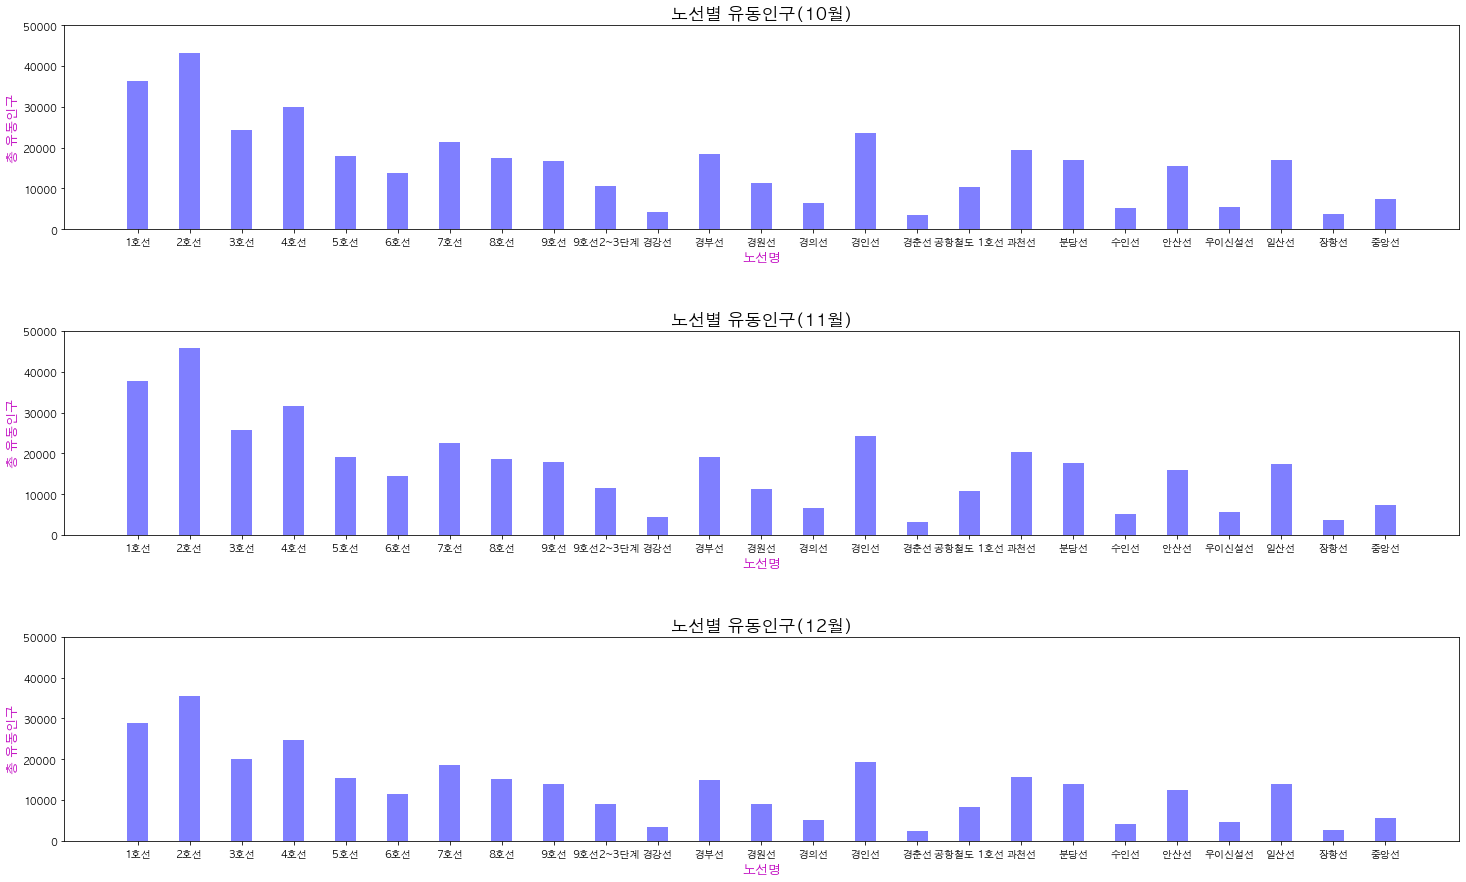

In [83]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)

print('[노선별 유동인구]\n')
#12월 노선별 유동인구
df12_no = pd.pivot_table(data12, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df12_no['총 유동인구']= df12_no.sum(axis=1)
#11월 노선별 유동인구
df11_no = pd.pivot_table(data11, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df11_no['총 유동인구']= df11_no.sum(axis=1)
#10월 노선별 유동인구
df10_no = pd.pivot_table(data10, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df10_no['총 유동인구']= df10_no.sum(axis=1)
fig = plt.figure(figsize=(25,15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
ax3.bar(df12_no.index, df12_no['총 유동인구'], color='b', alpha=0.5, width=0.4)
ax3.set_title('노선별 유동인구(12월)', fontsize=17)
ax3.set_xlabel('노선명', color='m', fontsize=13)
ax3.set_ylabel('총 유동인구', color='m', fontsize=13)
ax3.set_ylim([0,50000])
ax2.bar(df11_no.index, df11_no['총 유동인구'], color='b', alpha=0.5, width=0.4)
ax2.set_title('노선별 유동인구(11월)', fontsize=17)
ax2.set_xlabel('노선명', color='m', fontsize=13)
ax2.set_ylabel('총 유동인구', color='m', fontsize=13)
ax2.set_ylim([0,50000])
ax1.bar(df10_no.index, df10_no['총 유동인구'], color='b', alpha=0.5, width=0.4)
ax1.set_title('노선별 유동인구(10월)', fontsize=17)
ax1.set_xlabel('노선명', color='m', fontsize=13)
ax1.set_ylabel('총 유동인구', color='m', fontsize=13)
ax1.set_ylim([0,50000])

[유동인구가 많은 노선 TOP3]

       10월    11월    12월
노선명                     
2호선  43256  45901  35404
1호선  36263  37753  28795
4호선  30082  31611  24844


Text(0, 0.5, '총 유동인구')

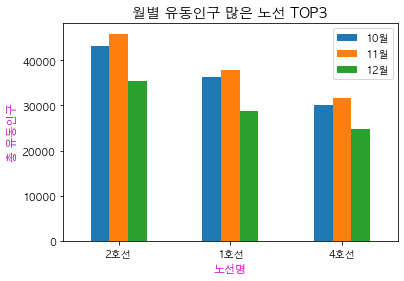

In [99]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)

#12월 노선별 유동인구
df12_no = pd.pivot_table(data12, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df12_no['총 유동인구']= df12_no.sum(axis=1)
#11월 노선별 유동인구
df11_no = pd.pivot_table(data11, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df11_no['총 유동인구']= df11_no.sum(axis=1)
#10월 노선별 유동인구
df10_no = pd.pivot_table(data10, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df10_no['총 유동인구']= df10_no.sum(axis=1)
print('[유동인구가 많은 노선 TOP3]\n')
ma12=df12_no.nlargest(3, '총 유동인구', keep='all')['총 유동인구']
ma11=df11_no.nlargest(3, '총 유동인구', keep='all')['총 유동인구']
ma10=df10_no.nlargest(3, '총 유동인구', keep='all')['총 유동인구']
mi12=df12_no.nsmallest(3, '총 유동인구', keep='all')['총 유동인구']
mi11=df11_no.nsmallest(3, '총 유동인구', keep='all')['총 유동인구']
mi10=df10_no.nsmallest(3, '총 유동인구', keep='all')['총 유동인구']
max3=pd.concat([ma10, ma11, ma12], axis=1, keys=['10월','11월', '12월'])

print(max3)
max3.plot.bar(rot=0)
plt.title("월별 유동인구 많은 노선 TOP3", fontsize=14)
plt.xlabel('노선명', color='m', fontsize=11)
plt.ylabel('총 유동인구', color='m', fontsize=11)





[유동인구가 적은 노선 TOP3]

      10월   11월   12월
노선명                  
경춘선  3431  3285  2516
장항선  3646  3565  2736
경강선  4280  4455  3310


Text(0, 0.5, '총 유동인구')

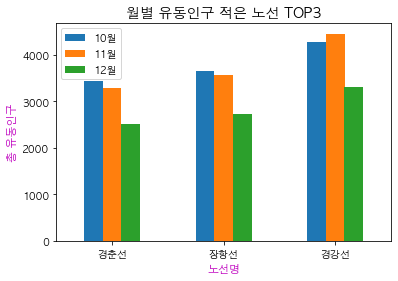

In [98]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)


#12월 노선별 유동인구
df12_no = pd.pivot_table(data12, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df12_no['총 유동인구']= df12_no.sum(axis=1)
#11월 노선별 유동인구
df11_no = pd.pivot_table(data11, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df11_no['총 유동인구']= df11_no.sum(axis=1)
#10월 노선별 유동인구
df10_no = pd.pivot_table(data10, index = ['노선명'], values=['승차승객수', '하차승객수']).apply(round).astype(int)
df10_no['총 유동인구']= df10_no.sum(axis=1)

mi12=df12_no.nsmallest(3, '총 유동인구', keep='all')['총 유동인구']
mi11=df11_no.nsmallest(3, '총 유동인구', keep='all')['총 유동인구']
mi10=df10_no.nsmallest(3, '총 유동인구', keep='all')['총 유동인구']
min3=pd.concat([mi10, mi11, mi12], axis=1, keys=['10월','11월', '12월'])

print('\n')
print('[유동인구가 적은 노선 TOP3]\n')
print(min3)

min3.plot.bar(rot=0)
plt.title("월별 유동인구 적은 노선 TOP3", fontsize=14)
plt.xlabel('노선명', color='m', fontsize=11)
plt.ylabel('총 유동인구', color='m', fontsize=11)



[유동인구 많은 역 TOP3]

            10월     11월     12월
역명                             
강남       135267  144677  102190
신림       104771  109941   90320
구로디지털단지   97029  103790   83811




Text(0, 0.5, '총 유동인구')

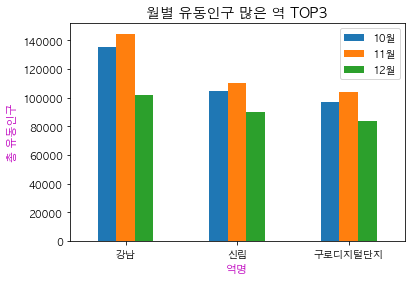

In [28]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)

data12['총 유동인구'] = data12['승차승객수']+data12['하차승객수']
data11['총 유동인구'] = data11['승차승객수']+data11['하차승객수']
data10['총 유동인구'] = data10['승차승객수']+data10['하차승객수']


df12_st = data12.groupby('역명')[['승차승객수', '하차승객수', '총 유동인구']].mean().apply(round).astype(int)
df11_st = data11.groupby('역명')[['승차승객수', '하차승객수', '총 유동인구']].mean().apply(round).astype(int)
df10_st = data10.groupby('역명')[['승차승객수', '하차승객수', '총 유동인구']].mean().apply(round).astype(int)
print('[유동인구 많은 역 TOP3]\n')
m12=df12_st.nlargest(3,'총 유동인구',keep='all')['총 유동인구']
m11=df11_st.nlargest(3,'총 유동인구',keep='all')['총 유동인구']
m10=df10_st.nlargest(3,'총 유동인구',keep='all')['총 유동인구']
max3=pd.concat([m10, m11, m12], axis=1, keys=['10월','11월', '12월'])
print(max3)
print('\n')

max3.plot.bar(rot=0)
plt.title("월별 유동인구 많은 역 TOP3", fontsize=14)
plt.xlabel('역명', color='m', fontsize=11)
plt.ylabel('총 유동인구', color='m', fontsize=11)


[유동인구 적은 역 TOP3]

     10월  11월  12월
역명                
임진강   78   38   22
지평   113  100   55
달월   134  126  114


Text(0, 0.5, '총 유동인구')

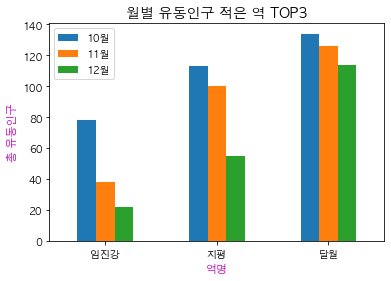

In [27]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

l=['날짜', '노선명', '역명', '승차승객수', '하차승객수']
data10 = pd.read_csv("./202010.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data11 = pd.read_csv("./202011.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)
data12 = pd.read_csv("./202012.csv", header=None, skiprows=1, usecols=[0,1,2,3,4],names=l)

data12['총 유동인구'] = data12['승차승객수']+data12['하차승객수']
data11['총 유동인구'] = data11['승차승객수']+data11['하차승객수']
data10['총 유동인구'] = data10['승차승객수']+data10['하차승객수']
#12월 역별 유동인구
df12_st = data12.groupby('역명')[['승차승객수', '하차승객수', '총 유동인구']].mean().apply(round).astype(int)
df11_st = data11.groupby('역명')[['승차승객수', '하차승객수', '총 유동인구']].mean().apply(round).astype(int)
df10_st = data10.groupby('역명')[['승차승객수', '하차승객수', '총 유동인구']].mean().apply(round).astype(int)

print('[유동인구 적은 역 TOP3]\n')
mi12=df12_st.nsmallest(3,'총 유동인구',keep='all')['총 유동인구']
mi11=df11_st.nsmallest(3,'총 유동인구',keep='all')['총 유동인구']
mi10=df10_st.nsmallest(3,'총 유동인구',keep='all')['총 유동인구']
min3=pd.concat([mi10, mi11, mi12], axis=1, keys=['10월','11월', '12월'])
print(min3)

min3.plot.bar(rot=0)
plt.title("월별 유동인구 적은 역 TOP3", fontsize=14)
plt.xlabel('역명', color='m', fontsize=11)
plt.ylabel('총 유동인구', color='m', fontsize=11)